# EXTRA

In [ ]:
    # if start == 0:
    #     plt.imshow(preds[0])
        
#     for pred in preds:
        
#         prob = tf.image.resize(prediction_2, (256, 256))
#         prob = np.array(prob)
        
#         ensembled_img = 0.35*(prediction_from_reconstructed) + 0.3333333*(prob) + 0.316667*(prediction_3)
#         ensembled_img = np.where(ensembled_img > 0.34, 1, 0)
        
#         prob = tf.image.resize(pred, (orig_height, orig_width))
#         #prob = cv2.resize(pred, (orig_width, orig_height))
#         mask = prob > 0.5
#         rle_result = rle_encode(mask)
#         rles.append(rle_result)

In [ ]:
# # https://www.kaggle.com/stainsby/fast-tested-rle ################ DOESNT WORK
# def rle(img):
#     flat_img = img.flatten()
#     flat_img = np.where(flat_img > 0.5, 1, 0).astype(np.uint8)
#     flat_img = np.insert(flat_img, [0, len(flat_img)], [0, 0])

#     starts = np.array((flat_img[:-1] == 0) & (flat_img[1:] == 1))
#     ends = np.array((flat_img[:-1] == 1) & (flat_img[1:] == 0))
#     starts_ix = np.where(starts)[0] + 1
#     ends_ix = np.where(ends)[0] + 1
#     lengths = ends_ix - starts_ix

#     encoding = ''
#     for idx in range(len(starts_ix)):
#         encoding += '%d %d ' % (starts_ix[idx], lengths[idx])
#     return encoding.strip()


# # Fast run length encoding
# def rle_1(img):
#     flat_img = img.flatten()
#     flat_img = np.where(flat_img > 0.5, 1, 0).astype(np.uint8)

#     starts = np.array((flat_img[:-1] == 0) & (flat_img[1:] == 1))
#     ends = np.array((flat_img[:-1] == 1) & (flat_img[1:] == 0))
#     starts_ix = np.where(starts)[0] + 2
#     ends_ix = np.where(ends)[0] + 2
#     lengths = ends_ix - starts_ix
    
#     return starts_ix, lengths

# mask = np.array(Image.open(r'D:\Fall2021_Temp\Elec 478\Project\train_masks\train_masks\00087a6bd4dc_01_mask.gif'), dtype=np.uint8)
# mask_rle = rle_1(mask)
# # print(mask_rle)


# def run_length_encode(mask):
#     '''
#     img: numpy array, 1 - mask, 0 - background
#     Returns run length as string formated
#     '''
#     inds = mask.flatten()
#     runs = np.where(inds[1:] != inds[:-1])[0] + 2
#     runs[1::2] = runs[1::2] - runs[:-1:2]
#     rle = ' '.join([str(r) for r in runs])
#     return rle


# TEST:
# Fast run length encoding
# def rle (img):
#     flat_img = img.flatten()
#     flat_img = np.where(flat_img > 0.5, 1, 0).astype(np.uint8)

#     starts = np.array((flat_img[:-1] == 0) & (flat_img[1:] == 1))
#     ends = np.array((flat_img[:-1] == 1) & (flat_img[1:] == 0))
#     starts_ix = np.where(starts)[0] + 2
#     ends_ix = np.where(ends)[0] + 2
#     lengths = ends_ix - starts_ix
    
#     return starts_ix, lengths

# TEST:
# def rle(img):
#     '''
#     img: numpy array, 1 - mask, 0 - background
#     Returns run length as string formated
#     '''
#     bytes = np.where(img.flatten() == 1)[0]
#     runs = []
#     prev = -2
#     for b in bytes:
#         if (b > prev + 1): runs.extend((b + 1, 0))
#         runs[-1] += 1
#         prev = b

#     return ' '.join([str(i) for i in runs])


# start = time.perf_counter()
# print(rle(np.array(Image.open(r'D:\Fall2021_Temp\Elec 478\Project\train_masks\train_masks\00087a6bd4dc_01_mask.gif'), dtype=np.uint8)) == df_train.loc['00087a6bd4dc_01']['rle_mask'])
# end = time.perf_counter()
# print(end-start)

# start = time.perf_counter()
# print(rle_encode(np.array(Image.open(r'D:\Fall2021_Temp\Elec 478\Project\train_masks\train_masks\00087a6bd4dc_01_mask.gif'), dtype=np.uint8)) == df_train.loc['00087a6bd4dc_01']['rle_mask'])
# end = time.perf_counter()
# print(end-start)

In [ ]:
def iou(y_true, y_pred):
    
    def f(y_true, y_pred):
        intersection = (y_true * y_pred).sum()
        union = y_true.sum() + y_pred.sum() - intersection
        x = (intersection + 1e-15) / (union + 1e-15)
        x = x.astype(np.float32)
        return x

    return tf.numpy_function(f, [y_true, y_pred], tf.float32)

def dice_coef2(y_true, y_pred, smooth=1):
    
    """
    Dice = (2*|X & Y|)/ (|X|+ |Y|)
         =  2*sum(|A*B|)/(sum(A^2)+sum(B^2))
    ref: https://arxiv.org/pdf/1606.04797v1.pdf
    """
    intersection = K.sum(K.abs(y_true * y_pred), axis=-1)
    return (2. * intersection + smooth) / (K.sum(K.square(y_true),-1) + K.sum(K.square(y_pred),-1) + smooth)

def dice_coef_loss2(y_true, y_pred):
    
    return 1-dice_coef2(y_true, y_pred)

U-Net Xception-style model

In [263]:
# Build model
unetX = get_model()
#model.compile(optimizer=RMSprop(learning_rate=0.05), loss=dice_coef_loss2, metrics=[dice_coef2])
unetX.compile(optimizer=RMSprop(learning_rate=0.1), loss=dice_loss, metrics=[dice_coef])

In [264]:
unetX.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 128, 128, 32) 896         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 128, 128, 32) 128         conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 128, 128, 32) 0           batch_normalization[0][0]        
______________________________________________________________________________________________

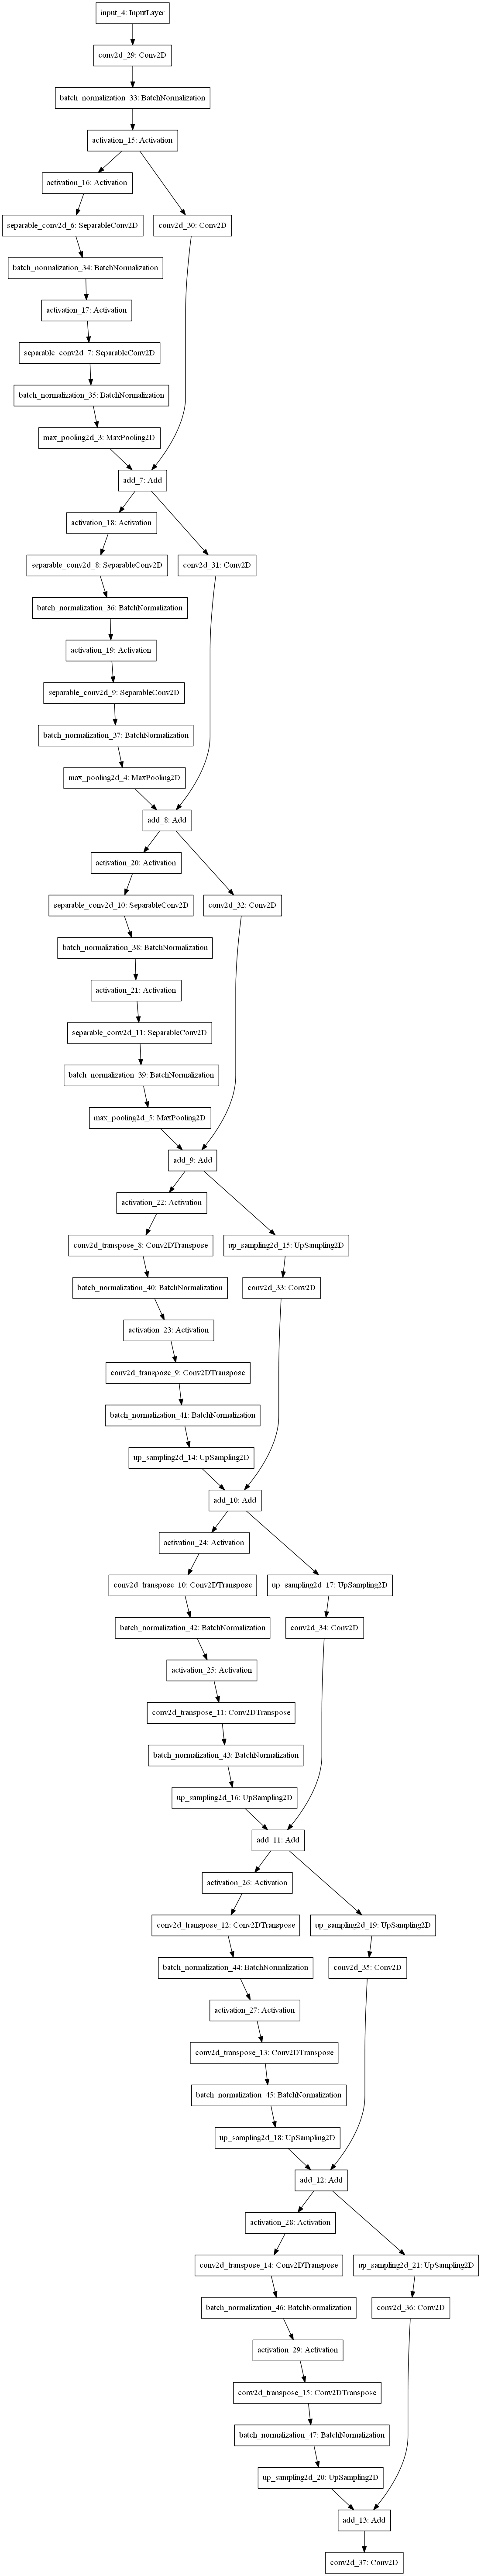

In [40]:
plot_model(unetX)

Epoch 1/100


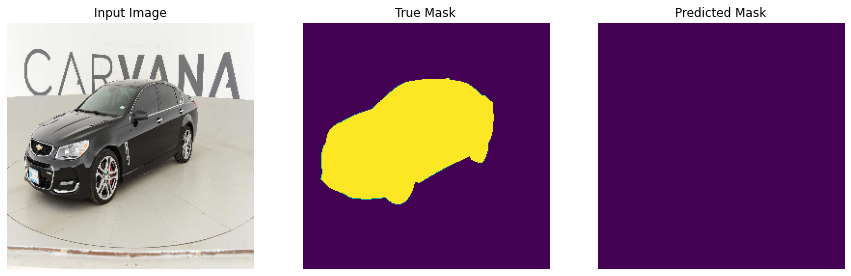

ResourceExhaustedError:  OOM when allocating tensor with shape[24,256,64,64] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[{{node gradient_tape/model/conv2d_5/Conv2D/Conv2DBackpropFilter-0-TransposeNHWCToNCHW-LayoutOptimizer}}]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info.
 [Op:__inference_train_function_154531]

Function call stack:
train_function


In [265]:
history = unetX.fit(train_generator, epochs=100, validation_data=val_generator, callbacks=[EarlyStop_callback, DisplayCallback()])

(128, 128, 3)


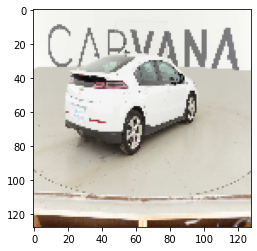

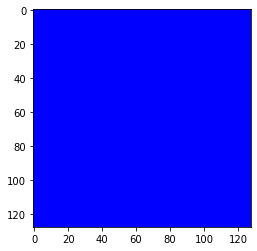

In [113]:
test_img = img_to_array(load_img(r'D:\Fall2021_Temp\Elec 478\Project\test\test\7e494ad628e7_11.jpg', target_size=(1280, 1918, 3)))/255
test_img = cv2.resize(test_img, (128, 128))
print(test_img.shape)
plt.figure()
plt.imshow(test_img)
plt.show()

prediction = model.predict(test_img.reshape(1, 128, 128, 3))
plt.figure()
plt.imshow(prediction[0])
plt.show()

In [ ]:
# df_train_shuffled = df_train.sample(frac = 1)

# frac = int(len(df_train_shuffled)*0.55)
# X_train = df_train_shuffled.iloc[:frac]
# X_val = df_train_shuffled.iloc[frac:]

U-Net Xception-style model

In [258]:
def get_model(input_shape=(256, 256, 3), num_classes=1):
    
    inputs = tf.keras.Input(shape=input_shape)

    ### [First half of the network: downsampling inputs] ###

    # Entry block
    x = Conv2D(32, 3, strides=2, padding="same")(inputs)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)

    previous_block_activation = x  # Set aside residual

    # Blocks 1, 2, 3 are identical apart from the feature depth.
    for filters in [64, 128, 256]:
        x = Activation("relu")(x)
        x = SeparableConv2D(filters, 3, padding="same")(x)
        x = BatchNormalization()(x)

        x = Activation("relu")(x)
        x = SeparableConv2D(filters, 3, padding="same")(x)
        x = BatchNormalization()(x)

        x = MaxPooling2D(3, strides=2, padding="same")(x)

        # Project residual
        residual = Conv2D(filters, 1, strides=2, padding="same")(previous_block_activation)
        x = add([x, residual])  # Add back residual
        previous_block_activation = x  # Set aside next residual

    ### [Second half of the network: upsampling inputs] ###

    for filters in [256, 128, 64, 32]:
        x = Activation("relu")(x)
        x = Conv2DTranspose(filters, 3, padding="same")(x)
        x = BatchNormalization()(x)

        x = Activation("relu")(x)
        x = Conv2DTranspose(filters, 3, padding="same")(x)
        x = BatchNormalization()(x)

        x = UpSampling2D(2)(x)

        # Project residual
        residual = UpSampling2D(2)(previous_block_activation)
        residual = Conv2D(filters, 1, padding="same")(residual)
        x = add([x, residual])  # Add back residual
        previous_block_activation = x  # Set aside next residual

    # Add a per-pixel classification layer
    outputs = Conv2D(num_classes, 3, activation="softmax", padding="same")(x)

    # Define the model
    model = tf.keras.Model(inputs, outputs)
    return model

DeepLabV3+ X

In [386]:
deeplabv3 = DeeplabV3Plus(image_size=256, num_classes=1)
deeplabv3.compile(optimizer=RMSprop(learning_rate=0.1), loss=dice_loss, metrics=[dice_coef])

In [387]:
deeplabv3.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 262, 262, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 128, 128, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 128, 128, 64) 256         conv1_conv[0][0]                 
____________________________________________________________________________________________

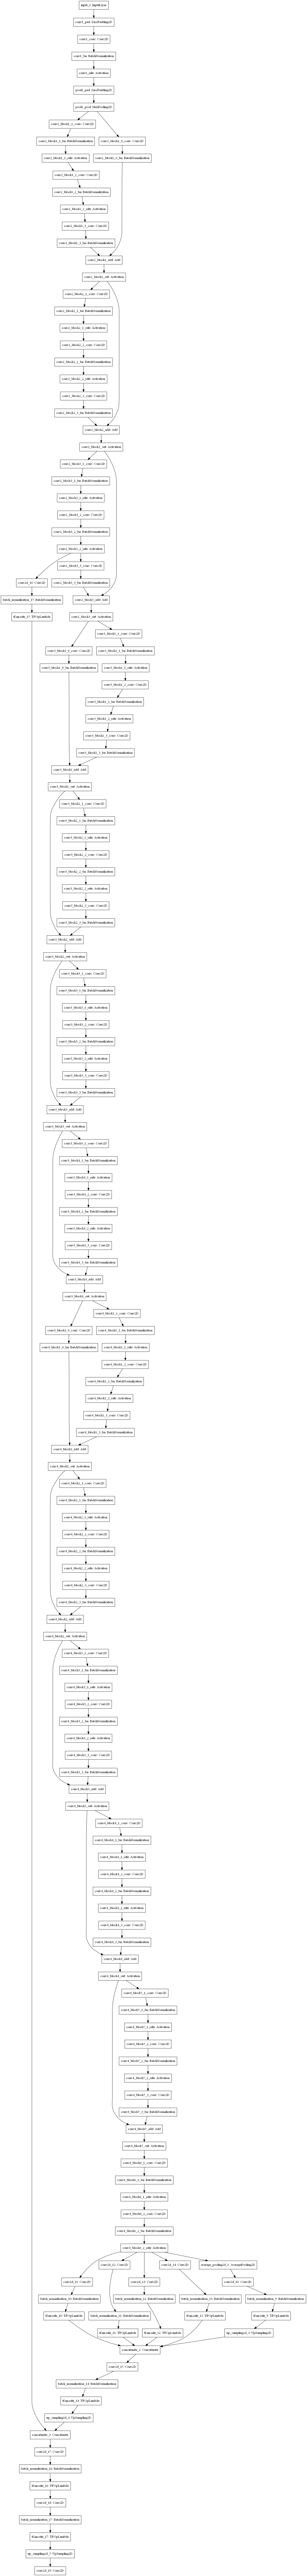

In [388]:
plot_model(deeplabv3)

Epoch 1/25


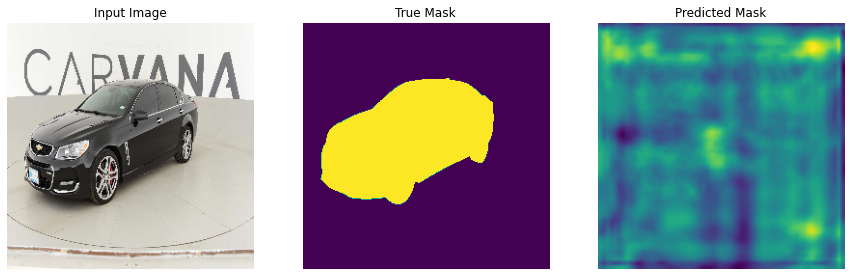

ResourceExhaustedError:  OOM when allocating tensor with shape[24,256,64,64] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[node model_1/conv2_block3_3_conv/Conv2D (defined at C:\Users\germa\AppData\Local\Temp/ipykernel_38392/1320705674.py:1) ]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info.
 [Op:__inference_train_function_243673]

Function call stack:
train_function


In [389]:
history_deeplabv3 = deeplabv3.fit(train_generator, epochs=25, validation_data=val_generator, callbacks=[DisplayCallback(), EarlyStop_callback])

DeepLabV3+

In [46]:
def convolution_block(
    block_input,
    num_filters=256,
    kernel_size=3,
    dilation_rate=1,
    padding="same",
    use_bias=False,
):
    x = layers.Conv2D(
        num_filters,
        kernel_size=kernel_size,
        dilation_rate=dilation_rate,
        padding="same",
        use_bias=use_bias,
        kernel_initializer=keras.initializers.HeNormal(),
    )(block_input)
    x = layers.BatchNormalization()(x)
    return tf.nn.relu(x)


def DilatedSpatialPyramidPooling(dspp_input):
    dims = dspp_input.shape
    x = layers.AveragePooling2D(pool_size=(dims[-3], dims[-2]))(dspp_input)
    x = convolution_block(x, kernel_size=1, use_bias=True)
    out_pool = layers.UpSampling2D(
        size=(dims[-3] // x.shape[1], dims[-2] // x.shape[2]), interpolation="bilinear",
    )(x)

    out_1 = convolution_block(dspp_input, kernel_size=1, dilation_rate=1)
    out_6 = convolution_block(dspp_input, kernel_size=3, dilation_rate=6)
    out_12 = convolution_block(dspp_input, kernel_size=3, dilation_rate=12)
    out_18 = convolution_block(dspp_input, kernel_size=3, dilation_rate=18)

    x = layers.Concatenate(axis=-1)([out_pool, out_1, out_6, out_12, out_18])
    output = convolution_block(x, kernel_size=1)
    return output


def DeeplabV3Plus(image_size, num_classes):
    model_input = keras.Input(shape=(image_size, image_size, 3))
    resnet50 = keras.applications.ResNet50(
        weights="imagenet", include_top=False, input_tensor=model_input
    )
    x = resnet50.get_layer("conv4_block6_2_relu").output
    x = DilatedSpatialPyramidPooling(x)

    input_a = layers.UpSampling2D(
        size=(image_size // 4 // x.shape[1], image_size // 4 // x.shape[2]),
        interpolation="bilinear",
    )(x)
    input_b = resnet50.get_layer("conv2_block3_2_relu").output
    input_b = convolution_block(input_b, num_filters=48, kernel_size=1)

    x = layers.Concatenate(axis=-1)([input_a, input_b])
    x = convolution_block(x)
    x = convolution_block(x)
    x = layers.UpSampling2D(
        size=(image_size // x.shape[1], image_size // x.shape[2]),
        interpolation="bilinear",
    )(x)
    model_output = layers.Conv2D(num_classes, kernel_size=(1, 1), padding="same")(x)
    return keras.Model(inputs=model_input, outputs=model_output)

In [ ]:
# train_generator = DataGenerator(df=X_train, img_height=128, img_width = 128, batch_size=8, shuffle=True)
# val_generator = DataGenerator(df=X_val, img_height=128, img_width=128, batch_size=8, shuffle=True, augment=False)

# a = train_generator.__getitem__(0)
# b = val_generator.__getitem__(0)

# print('------------------------------------------------------------------------------------')

# print(a[0].shape)
# print(a[1].shape)
# print(b[0].shape)
# print(b[1].shape)

#X_train, X_val = model_selection.train_test_split(df_train, test_size=0.45)

In [ ]:
IMAGE_SIZE = 512
BATCH_SIZE = 4
NUM_CLASSES = 20
DATA_DIR = "./instance-level_human_parsing/instance-level_human_parsing/Training"
NUM_TRAIN_IMAGES = 1000
NUM_VAL_IMAGES = 50

train_images = sorted(glob(os.path.join(DATA_DIR, "Images/*")))[:NUM_TRAIN_IMAGES]
train_masks = sorted(glob(os.path.join(DATA_DIR, "Category_ids/*")))[:NUM_TRAIN_IMAGES]
val_images = sorted(glob(os.path.join(DATA_DIR, "Images/*")))[
    NUM_TRAIN_IMAGES : NUM_VAL_IMAGES + NUM_TRAIN_IMAGES
]
val_masks = sorted(glob(os.path.join(DATA_DIR, "Category_ids/*")))[
    NUM_TRAIN_IMAGES : NUM_VAL_IMAGES + NUM_TRAIN_IMAGES
]


def read_image(image_path, mask=False):
    image = tf.io.read_file(image_path)
    if mask:
        image = tf.image.decode_png(image, channels=1)
        image.set_shape([None, None, 1])
        image = tf.image.resize(images=image, size=[IMAGE_SIZE, IMAGE_SIZE])
    else:
        image = tf.image.decode_png(image, channels=3)
        image.set_shape([None, None, 3])
        image = tf.image.resize(images=image, size=[IMAGE_SIZE, IMAGE_SIZE])
        image = image / 127.5 - 1
    return image


def load_data(image_list, mask_list):
    image = read_image(image_list)
    mask = read_image(mask_list, mask=True)
    return image, mask


def data_generator(image_list, mask_list):
    dataset = tf.data.Dataset.from_tensor_slices((image_list, mask_list))
    dataset = dataset.map(load_data, num_parallel_calls=tf.data.AUTOTUNE)
    dataset = dataset.batch(BATCH_SIZE, drop_remainder=True)
    return dataset


train_dataset = data_generator(train_images, train_masks)
val_dataset = data_generator(val_images, val_masks)

print("Train Dataset:", train_dataset)
print("Val Dataset:", val_dataset)

In [ ]:
# import time
# val_generator = DataGenerator(data = X_val.index.to_list(), df = X_val, batch_size=16, shuffle=False, augment=False)

# start = time.perf_counter()
# j = val_generator.__getitem__(20)
# end = time.perf_counter()

# print(end-start)

In [ ]:
# import time
# train_generator = DataGenerator(data = df_train.index.to_list(), df = df_train, batch_size=16, shuffle=True)

# start = time.perf_counter()
# train_generator.__getitem__(317)
# end = time.perf_counter()

# print(end-start)

In [ ]:
# WONT WORK BC I HAVE TO ALLOCATE LIKE 29 GB OF MEMORY
# img_ds = list(map(lambda x: cv2.imread(x), df_train.path.to_list()))
# mask_ds = list(map(lambda x: imageio.mimread(x), df_train.mask_path.to_list()))

# trainAug = Sequential([
# 	preprocessing.Rescaling(scale=1.0 / 255),
# 	preprocessing.RandomFlip("horizontal_and_vertical"),
# 	preprocessing.RandomZoom(
# 		height_factor=(-0.05, -0.15),
# 		width_factor=(-0.05, -0.15)),
# 	preprocessing.RandomRotation(0.3)
# ])

# trainDS = tf.data.Dataset.from_tensor_slices((trainX, trainLabels))
# trainDS = (
#     trainDS
#     .shuffle(64 * 100)
#     .batch(64)
#     .map(lambda x, y: (trainAug(x), y), num_parallel_calls=tf.data.AUTOTUNE)
#     .prefetch(tf.data.AUTOTUNE)
# )

In [ ]:
# def zoom(img, scale):
    
#     #print(scale)
#     old_height, old_width = img.shape[0:2]
#     scaled_img = cv2.resize(img, (int(img.shape[1]*scale), int(img.shape[0]*scale)), interpolation=cv2.INTER_AREA)
#     new_height, new_width = scaled_img.shape[0:2]
#     #print('old shape', img.shape)
#     #print('new shape', scaled_img.shape)
    
#     height_edge = int((new_height - old_height)/2) + 1
#     usable_height_bottom = int(new_height/2) - height_edge
#     usable_height_top = int(new_height/2) + height_edge
#     width_edge = int((new_width - old_width)/2) + 1
#     usable_width_bottom = int(new_width/2) - width_edge
#     usable_width_top = int(new_width/2) + width_edge
    
#     #print('height range: ', usable_height_bottom, usable_height_top)
#     #print('width range: ', usable_width_bottom, usable_width_top)

#     mid_height_to_use = np.random.randint(usable_height_bottom, usable_height_top)
#     mid_width_to_use = np.random.randint(usable_width_bottom, usable_width_top)
#     #print(mid_height_to_use, mid_width_to_use)

#     low_height = mid_height_to_use - int(old_height/2)
#     high_height = mid_height_to_use + int(old_height/2)

#     low_width = mid_width_to_use - int(old_width/2)
#     high_width = mid_width_to_use + int(old_width/2)
    
#     if len(img.shape) == 2:
#         zoomed_img = scaled_img[low_height:high_height, low_width:high_width]
#         zoomed_img = cv2.merge((zoomed_img,zoomed_img,zoomed_img))
#         return zoomed_img
    
#     zoomed_img = scaled_img[low_height:high_height, low_width:high_width,:]
#     #print('new height range: ', low_height, high_height)
#     #print('new width range: ', low_width, high_width)
#     return zoomed_img